---

# B400 Advanced Corporate Finance
### Submitted by: Veja Sovaite and Jorge
### January 20, 2025

The firm we chose to analyze is Merck KGaA. It is a leading science and technology company, operates across Healthcare, Life Science and Electronics, based in Darmstadt, Germany.

## Task (a): detailed short-term and medium-term forecast of cash flows

Our asumptions. 

First for growth rate of sales:
1. Yahoo Finance (MRK.DE, “Analysis” section) indicates a 4.59% revenue growth for Merck KGaA in 2025 (https://finance.yahoo.com/quote/MRK.DE/analysis/)
2. MarketScreener provides a 4.43% growth rate estimate for Merck KGaA in 2026 (https://de.marketscreener.com/kurs/aktie/MERCK-KGAA-436395/finanzen/)
3. Statista reports a 4.71% CAGR (2025–2029) for the German pharmaceuticals market as a whole (https://www.statista.com/outlook/hmo/pharmaceuticals/germany)
4. For the year 2030 we will also assume the annual growth rate of 4.71%.
5. For year 2024, we will assume growth rate 4.5% => (https://www.merckgroup.com/investors/reports-and-financials/earnings-materials/2024-q2/en/2024-Q2-Press-Release-EN.pdf)

Tax rate assumptions:
1. We assume 30% tax rate for unlevered FCF. In Germany, the combined (federal + local) corporate tax rate often ends up around 30%. Look this up: https://taxfoundation.org/data/all/eu/germany-trade-tax-rates/

Assumptions for a terminal value:
1. We assumed 2.5% as a growth rate for terminal value, because analysts conclude that 2–3% best reflects both mature-market constraints and long-term inflation plus GDP expansion.
Over the long run, large mature businesses typically grow in line with or just above inflation plus real GDP (around 2% in developed markets), and in the pharmaceutical industry—where higher growth periods may be offset by competition and patent cliffs—this often normalizes to moderate single digits. As a result, professional valuations commonly apply a 2–3% terminal growth rate, striking a balance between realistic R&D-driven growth and broader macro constraints. Accordingly, choosing a 2% or 2.5% perpetuity rate is both conservative and justifiable for Merck, aligning with long-term economic patterns and industry norms.
2. We'll assume an 8% discount rate as it is a typical ballpark figure often used in DCF models for large, mature companies.

Assumptions task (e):
1. We assume time to maturity T=5 years, because it reflects the typical time horizon over which long-term corporate debt is structured, particularly for large, stable firms like Merck KGaA.

In [22]:
import pandas as pd
import numpy as np

# First, we load historical data into a DataFrame
df_hist = pd.DataFrame({
    "Year": [
        2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 
        2014, 2013, 2012, 2011, 2010, 2009
    ],
    "Sales": [  
        20993, 22232, 19687, 17534, 16152, 14836, 14517, 15024, 12844.7, 
        11362.8, 11095.1, 11172.9, 10276.4, 9290.6, 7747
    ],
    "Cost_of_Sales": [  
        8370, 8413, 7325, 6782, 5951, 5342, 5071, 5201, 4076.3,
        3526.4, 3041.7, 4029.3, 3623.5, 3070, 2687.1
    ],
    "EBIT": [
        4241, 5263, 4372, 3070, 2509, 2128, 2464, 2492, 2244.5, 
        1836, 2138, 1886.3, 1398.1, 1404, 835
    ],
    "D_and_A": [  
        1782, 1798, 1712, 1758, 1905, 1748, 2442, 1934, 1383.4,
        1360.9, 1237.9, 1319.3, 1244.7, 1257.9, 1003.8
    ],
    "CapEx": [
        2023.0, 1806.0, 1421.0, 1563.0, 1021.0, 1016.0, 1311.0, 848.0, 693.0, 
        624.2, 516.6, 473.3, 446.0, 500.4, 563.9
    ],    
    "WC_wo_Cash": [  
        1617.0, 968.0, -1135.0, -1185.0, -3437.0, -1480.0, -1803.0, -2400.0, -3063.0,
        -1156.2, 139.4, -245.0, 763.8, 1307.1, 667.5
    ]
})
df_hist.sort_values("Year", inplace=True)

# Next, we calculate some ratios and margins based on historical data 
# for a simplified forecast, we keep margins & ratios "constant"
# We'll compute some average values over recent years (2009–2023)
df_hist["EBIT_Margin"] = df_hist["EBIT"] / df_hist["Sales"]
df_hist["Cost_of_Sales_%"] = df_hist["Cost_of_Sales"] / df_hist["Sales"]
df_hist["D_and_A_%"] = df_hist["D_and_A"] / df_hist["Sales"]
df_hist["CapEx_%"] = df_hist["CapEx"] / df_hist["Sales"]
df_hist["WC_wo_Cash_%"] = df_hist["WC_wo_Cash"] / df_hist["Sales"]

# Here we pick all years from 2009 onward for margins:
df_recent = df_hist[df_hist["Year"] >= 2009]

avg_ebit_margin = df_recent["EBIT_Margin"].mean()
avg_cost_sales_pct = df_recent["Cost_of_Sales_%"].mean()
avg_dna_pct = df_recent["D_and_A_%"].mean()
avg_capex_pct = df_recent["CapEx_%"].mean()

# For WC, we exclude negative or extreme values so we get a stable ratio
# and then apply that same ratio to every forecast year’s Sales
df_stable = df_hist[df_hist["WC_wo_Cash"] > 0]
stable_wc_ratio = (df_stable["WC_wo_Cash"] / df_stable["Sales"]).mean()

print("Historical Average Ratios (2009–2023):")
print(f"EBIT Margin      = {avg_ebit_margin:.2%}")
print(f"Cost of Sales %  = {avg_cost_sales_pct:.2%}")
print(f"D&A % of Sales   = {avg_dna_pct:.2%}")
print(f"CapEx % of Sales = {avg_capex_pct:.2%}")
print(f"WC (excl. cash) ratio (excl. negatives) = {stable_wc_ratio:.2%}")
print()

# Our assumptions for sales growth by year
sales_growth_map = {
    2024: 0.045,
    2025: 0.0459,
    2026: 0.0443,
    2027: 0.0471,
    2028: 0.0471,
    2029: 0.0471,
    2030: 0.0471
}

last_hist_year = df_hist["Year"].max()
last_hist_sales = df_hist.loc[df_hist["Year"] == last_hist_year, "Sales"].values[0]

# For storing forecast data
forecast_data = {
    "Year": [],
    "Sales": [],
    "Cost_of_Sales": [],
    "EBIT": [],
    "D_and_A": [],
    "CapEx": [],
    "WC_wo_Cash": []
}

# We initialize current sales at last year's historical sales
current_sales = last_hist_sales

# Then build the forecast by year
for year in sorted(sales_growth_map.keys()):
    growth = sales_growth_map[year]
    current_sales *= (1 + growth)
    
    cost_of_sales = current_sales * avg_cost_sales_pct
    ebit = current_sales * avg_ebit_margin
    d_and_a = current_sales * avg_dna_pct
    capex = current_sales * avg_capex_pct
    
    # We apply the stable WC ratio
    wc_wo_cash = current_sales * stable_wc_ratio
    
    forecast_data["Year"].append(year)
    forecast_data["Sales"].append(current_sales)
    forecast_data["Cost_of_Sales"].append(cost_of_sales)
    forecast_data["EBIT"].append(ebit)
    forecast_data["D_and_A"].append(d_and_a)
    forecast_data["CapEx"].append(capex)
    forecast_data["WC_wo_Cash"].append(wc_wo_cash)

df_forecast = pd.DataFrame(forecast_data)

# We'll assume a 30% tax rate for unlevered FCF
tax_rate = 0.30

df_merged = pd.concat([df_hist, df_forecast], ignore_index=True).sort_values("Year")

# Here are our calculations for unlevered FCF
df_merged["NOPLAT"] = df_merged["EBIT"] * (1 - tax_rate)

df_merged["WC_wo_Cash_Shift"] = df_merged["WC_wo_Cash"].shift(1)
df_merged["Delta_WC"] = df_merged["WC_wo_Cash"] - df_merged["WC_wo_Cash_Shift"]

df_merged["FCF"] = (
    df_merged["NOPLAT"]
    + df_merged["D_and_A"]
    - df_merged["CapEx"]
    - df_merged["Delta_WC"]
)

df_final = df_merged[df_merged["Year"] >= 2023].copy()

df_final


Historical Average Ratios (2009–2023):
EBIT Margin      = 17.09%
Cost of Sales %  = 35.02%
D&A % of Sales   = 11.53%
CapEx % of Sales = 6.57%
WC (excl. cash) ratio (excl. negatives) = 7.24%



,Year,Sales,Cost_of_Sales,EBIT,D_and_A,CapEx,WC_wo_Cash,EBIT_Margin,Cost_of_Sales_%,D_and_A_%,CapEx_%,WC_wo_Cash_%,NOPLAT,WC_wo_Cash_Shift,Delta_WC,FCF
14,2023,"20,993.00","8,370.00","4,241.00","1,782.00","2,023.00","1,617.00",0.20,0.40,0.08,0.10,0.08,"2,968.70",968.00,649.00,"2,078.70"
15,2024,"21,937.68","7,681.65","3,748.55","2,528.54","1,440.90","1,587.96",NaN,NaN,NaN,NaN,NaN,"2,623.98","1,617.00",-29.04,"3,740.66"
16,2025,"22,944.62","8,034.24","3,920.60","2,644.60","1,507.04","1,660.84",NaN,NaN,NaN,NaN,NaN,"2,744.42","1,587.96",72.89,"3,809.10"
17,2026,"23,961.07","8,390.16","4,094.29","2,761.76","1,573.80","1,734.42",NaN,NaN,NaN,NaN,NaN,"2,866.00","1,660.84",73.58,"3,980.38"
18,2027,"25,089.64","8,785.34","4,287.13","2,891.84","1,647.93","1,816.11",NaN,NaN,NaN,NaN,NaN,"3,000.99","1,734.42",81.69,"4,163.21"
19,2028,"26,271.36","9,199.13","4,489.05","3,028.04","1,725.55","1,901.65",NaN,NaN,NaN,NaN,NaN,"3,142.34","1,816.11",85.54,"4,359.29"
20,2029,"27,508.74","9,632.40","4,700.49","3,170.66","1,806.82","1,991.22",NaN,NaN,NaN,NaN,NaN,"3,290.34","1,901.65",89.57,"4,564.62"
21,2030,"28,804.40","10,086.09","4,921.88","3,320.00","1,891.92","2,085.00",NaN,NaN,NaN,NaN,NaN,"3,445.32","1,991.22",93.79,"4,779.61"


## Task (a): terminal value

In [24]:
# We'll assume an 8% discount rate (r = 0.08) and calculate terminal value as V = X / (r-g)
discount_rate = 0.08
terminal_growth = 0.025
year_terminal = 2030

# FCF in 2030
fcf_2030 = df_final.loc[df_final["Year"] == year_terminal, "FCF"].values[0]


# Next, we calculate terminal value
terminal_value_2030 = fcf_2030 / (discount_rate - terminal_growth)

n = year_terminal - last_hist_year  

df_final["Terminal_Value"] = np.where(
    df_final["Year"] == year_terminal, terminal_value_2030, 0.0
)

df_final


,Year,Sales,Cost_of_Sales,EBIT,D_and_A,CapEx,WC_wo_Cash,EBIT_Margin,Cost_of_Sales_%,D_and_A_%,CapEx_%,WC_wo_Cash_%,NOPLAT,WC_wo_Cash_Shift,Delta_WC,FCF,Terminal_Value
14,2023,"20,993.00","8,370.00","4,241.00","1,782.00","2,023.00","1,617.00",0.20,0.40,0.08,0.10,0.08,"2,968.70",968.00,649.00,"2,078.70",0.00
15,2024,"21,937.68","7,681.65","3,748.55","2,528.54","1,440.90","1,587.96",NaN,NaN,NaN,NaN,NaN,"2,623.98","1,617.00",-29.04,"3,740.66",0.00
16,2025,"22,944.62","8,034.24","3,920.60","2,644.60","1,507.04","1,660.84",NaN,NaN,NaN,NaN,NaN,"2,744.42","1,587.96",72.89,"3,809.10",0.00
17,2026,"23,961.07","8,390.16","4,094.29","2,761.76","1,573.80","1,734.42",NaN,NaN,NaN,NaN,NaN,"2,866.00","1,660.84",73.58,"3,980.38",0.00
18,2027,"25,089.64","8,785.34","4,287.13","2,891.84","1,647.93","1,816.11",NaN,NaN,NaN,NaN,NaN,"3,000.99","1,734.42",81.69,"4,163.21",0.00
19,2028,"26,271.36","9,199.13","4,489.05","3,028.04","1,725.55","1,901.65",NaN,NaN,NaN,NaN,NaN,"3,142.34","1,816.11",85.54,"4,359.29",0.00
20,2029,"27,508.74","9,632.40","4,700.49","3,170.66","1,806.82","1,991.22",NaN,NaN,NaN,NaN,NaN,"3,290.34","1,901.65",89.57,"4,564.62",0.00
21,2030,"28,804.40","10,086.09","4,921.88","3,320.00","1,891.92","2,085.00",NaN,NaN,NaN,NaN,NaN,"3,445.32","1,991.22",93.79,"4,779.61","86,901.99"


## Task (b): estimating the beta factor and the cost of equity using the CAPM model

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Merck Indices:
DatetimeIndex(['2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01', '2015-01-01', '2015-02-01',
               '2015-03-01', '2015-04-01',
               ...
               '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01',
               '2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01'],
              dtype='datetime64[ns]', name='Date', length=120, freq=None)

DAX Indices:
DatetimeIndex(['2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01', '2015-01-01', '2015-02-01',
               '2015-03-01', '2015-04-01',
               ...
               '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01',
               '2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01'],
              dtype='datetime64[ns]', name='Date', length=120, freq=None)

Combined Data:
            Merck       DAX

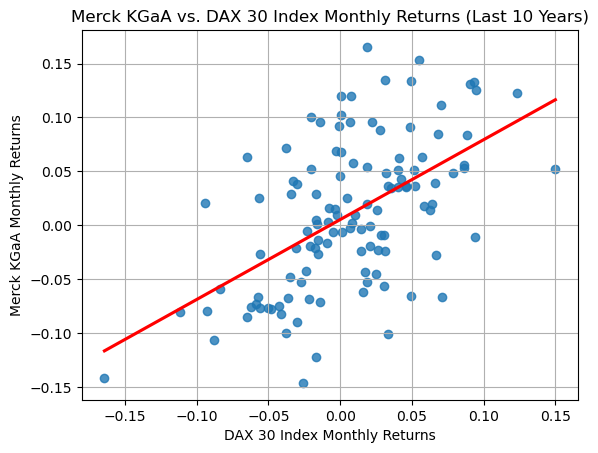

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# We first download data for Merck KGaA and DAX 30 Index (last 8 years)
start_date = '2014-07-01'
end_date = '2024-07-01'

# Then we download monthly adjusted closing prices
merck = yf.download('MRK.DE', start=start_date, end=end_date, interval='1mo')
dax = yf.download('^GDAXI', start=start_date, end=end_date, interval='1mo')

# We only keep the adjusted closing prices
merck_close = merck['Adj Close'] if 'Adj Close' in merck.columns else merck['Close']
dax_close = dax['Adj Close'] if 'Adj Close' in dax.columns else dax['Close']

# Here we check the indices of the series
print("Merck Indices:")
print(merck_close.index)
print("\nDAX Indices:")
print(dax_close.index)

# Then we align the indices using an inner join
df = pd.concat([merck_close, dax_close], axis=1, join='inner')
df.columns = ['Merck', 'DAX']

df.dropna(inplace=True)

print("\nCombined Data:")
print(df)

# Then we calculate monthly returns
df['Merck_Return'] = df['Merck'].pct_change()
df['DAX_Return'] = df['DAX'].pct_change()
df.dropna(inplace=True)

# We calculate the standard deviation of monthly returns (volatility) needed later for task e
monthly_volatility = df['Merck_Return'].std()
annualized_volatility = monthly_volatility * np.sqrt(12)
print(f"Annualized Volatility of Merck KGaA Returns: {annualized_volatility:.2%}")


# Finally, we calculate Beta
cov_matrix = np.cov(df['Merck_Return'], df['DAX_Return'])
beta = cov_matrix[0, 1] / cov_matrix[1, 1]
print(f"\nBeta of Merck KGaA relative to the DAX 30 Index (last 10 years): {beta:.4f}")

# This is a plot of returns with a regression line
sns.regplot(x='DAX_Return', y='Merck_Return', data=df, ci=None, line_kws={"color": "red"})
plt.title('Merck KGaA vs. DAX 30 Index Monthly Returns (Last 10 Years)')
plt.xlabel('DAX 30 Index Monthly Returns')
plt.ylabel('Merck KGaA Monthly Returns')
plt.grid(True)
plt.show()


# 1. Beta Value Interpretation
Beta = 0.7395
Beta less than 1:
A beta of 0.7395 indicates that Merck KGaA is less volatile than the DAX 30 Index.
For every 1% change in the DAX 30 Index, Merck KGaA's stock price is expected to change by approximately 0.62% in the same direction.
This suggests that Merck KGaA is a defensive stock — it tends to move with the market, but its price movements are less pronounced compared to the overall market.
Risk and Return Implications
Lower Risk:
Merck KGaA carries lower systematic risk compared to the DAX 30 Index.
In market downturns, Merck KGaA’s stock is likely to decline less than the broader market.
Lower Returns in Uptrends:
Conversely, during market uptrends, Merck KGaA may not rise as much as the overall market.


In [63]:
# Next, we download historical market data (DAX 30 Index as an example)
ticker = "^GDAXI"  # DAX 30 Index ticker
start_date = "2014-07-01"
end_date = "2024-07-01"

# We fetch monthly data for the last 10 years
market_data = yf.download(ticker, start=start_date, end=end_date, interval='1mo')

# And then calculate monthly returns
if 'Adj Close' in market_data.columns:
    price_data = market_data['Adj Close']
elif 'Close' in market_data.columns:
    price_data = market_data['Close']
else:
    raise KeyError("Neither 'Adj Close' nor 'Close' found in the dataset!")

market_data['Monthly_Return'] = price_data.pct_change()
market_data.dropna(inplace=True)

# We finally calculate the average monthly return
average_monthly_return = market_data['Monthly_Return'].mean()
annualized_return = (1 + average_monthly_return) ** 12 - 1

print(f"Average Annual Market Return: {annualized_return:.2%}")


[*********************100%***********************]  1 of 1 completed

Average Annual Market Return: 8.54%


In [66]:
# Here we assume a risk-free rate of 2.14% (10-year German government bond yield) and use the other calculated values
risk_free_rate = 2.14 / 100     
beta = beta                   
market_return = annualized_return      

# We then calculate market risk premium
market_risk_premium = market_return - risk_free_rate

# And next we calculate cost of equity using CAPM
cost_of_equity = risk_free_rate + beta * market_risk_premium

print(f"Cost of Equity (k_S): {cost_of_equity:.2%}")


Cost of Equity (k_S): 6.87%


### What Does This Mean?
1. **Cost of Equity (\(k_S\))**: **6.87%**:
   - Investors require a **6.87% annual return** for investing in this stock.
   - This return compensates them for the **time value of money** and the **risk** of the investment.
   - The cost of equity is used as the **discount rate** for evaluating future cash flows in valuation models like the **Discounted Cash Flow (DCF)**.

2. **Implications for Valuation**:
   - If the company's expected returns are **higher** than 6.87%, the stock may be considered **undervalued**.
   - If the expected returns are **lower**, the stock may be considered **overvalued**.

3. **Risk Perspective**:
   - A **beta of 0.7395** indicates that the stock is **less volatile** than the overall market.
   - The stock is likely to experience **smaller fluctuations** compared to the market index.


## Task (c): Firm value with WACC aproach assuming constant debt ratio

In [26]:
# We select the relevant data for the calculation pre-tax cost of debt
data = {
    "Year": [2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009],
    "Total Debt": [9864.0, 10398.0, 10766.0, 12040.0, 13119.0, 8807.0, 10710.0, 12469.0, 13529.0, 5484.0, 3638.5, 4294.0, 5319.8, 5483.5, 2236.3],
    "Interest Expense": [253.0, 194.0, 272.0, 387.0, 430.0, 267.0, 295.0, 290.0, 303.0, 162.4, 176.6, 221.9, 227.2, 417.8, 177.4]
}

df = pd.DataFrame(data)

# Calculate the pre-tax cost of debt and after-tax cost of debt
df['Pre-Tax Cost of Debt'] = df['Interest Expense'] / df['Total Debt']
pre_tax_cost_of_debt = df['Pre-Tax Cost of Debt'].mean()

# we assume a marginal tax rate of 30%
marginal_tax_rate = 0.30

# And the we calculate after-tax cost of debt
cost_of_debt_after_tax = pre_tax_cost_of_debt * (1 - marginal_tax_rate)

pre_tax_cost_of_debt, cost_of_debt_after_tax

(0.03773737289233511, 0.026416161024634573)

In [28]:
# Now, we calculate the weighted average cost of capital (WACC)
# From task b we use the calculated cost of equity
cost_of_equity = 0.0687  

E = 62.651  # Market Capitalization (Equity) for 2023
D = 9.864   # Debt for 2023
V = E + D

# Weights
weight_equity = E / V
weight_debt = D / V

# WACC
wacc = (weight_equity * cost_of_equity) + (weight_debt * cost_of_debt_after_tax)


# We discount each year's FCF and Terminal_Value by WACC
df_final["t"] = df_final["Year"] - 2023
df_final["Discount_Factor"] = 1 / ((1 + wacc) ** df_final["t"])

# Present Value of each year's FCF
df_final["PV_FCF"] = df_final["FCF"] * df_final["Discount_Factor"]

# Present Value of Terminal Value (only in final year)
df_final["PV_Terminal_Value"] = df_final["Terminal_Value"] * df_final["Discount_Factor"]

# Firm Value = sum of PV(FCF) + sum of PV(Terminal Value)
firm_value = df_final["PV_FCF"].sum() + df_final["PV_Terminal_Value"].sum()

# We display the results
print(f"Average Cost of Debt (before tax): {pre_tax_cost_of_debt:.2%}")
print(f"Weight of Equity (E/V): {weight_equity:.2%}")
print(f"Weight of Debt   (D/V): {weight_debt:.2%}")
print(f"Cost of Equity (kS): {cost_of_equity:.2%}")
print(f"After-tax Cost of Debt: {cost_of_debt_after_tax:.2%}")
print(f"WACC: {wacc:.2%}")
print(f"\nEstimated Firm Value (end of 2023) = {firm_value:,.2f} (in same units as FCF)")

Average Cost of Debt (before tax): 3.77%
Weight of Equity (E/V): 86.40%
Weight of Debt   (D/V): 13.60%
Cost of Equity (kS): 6.87%
After-tax Cost of Debt: 2.64%
WACC: 6.29%

Estimated Firm Value (end of 2023) = 81,721.38 (in same units as FCF)


## Task (c): Firm value with APV approach assuming fixed absolute credit plan

In [36]:
# Our calculations for the APV valuation with fixed absolute debt
DE_ratio = D / E # Debt-to-Equity ratio
r_u = (cost_of_equity + DE_ratio * (1 - marginal_tax_rate) * pre_tax_cost_of_debt) / (1 + DE_ratio * (1 - marginal_tax_rate)) # Unlevered cost of equity (M&M with corporate taxes)
df_final["Discount_Factor_UE"] = 1 / ((1 + r_u) ** df_final["t"]) # discount factor for unlevered equity
df_final["PV_Unlevered_FCF"] = df_final["FCF"] * df_final["Discount_Factor_UE"] # present value of unlevered free cash flows
df_final["PV_Terminal_Value"] = df_final["Terminal_Value"] * df_final["Discount_Factor_UE"] # present value of terminal value
unlevered_value = df_final["PV_Unlevered_FCF"].sum() + df_final["PV_Terminal_Value"].sum() # Unlevered Firm Value
df_final["Interest_Expense"] = pre_tax_cost_of_debt * D # Interest Expense
df_final["Tax_Shield"] = df_final["Interest_Expense"] * marginal_tax_rate # Tax Shield
df_final["PV_Tax_Shield"] = df_final["Tax_Shield"] * df_final["Discount_Factor_UE"] # Present value of the annual tax shield
pv_tax_shield = df_final["PV_Tax_Shield"].sum() # Total present value of the tax shield

apv_value = unlevered_value + pv_tax_shield

print("APV Valuation with Fixed Absolute Debt:\n")
print(f"Unlevered Firm Value = {unlevered_value:,.2f}")
print(f"PV of Tax Shield = {pv_tax_shield:,.2f}")
print(f"APV (Firm Value) = {apv_value:,.2f}")

APV Valuation with Fixed Absolute Debt:

Unlevered Firm Value = 80,506.34
PV of Tax Shield = 0.72
APV (Firm Value) = 80,507.06


## Task (c): Firm value with APV aproach assuming constant debt ratio

In [38]:
# We first choose a target Debt-to-Value ratio which is the Debt-to-Equity ratio of year 2023
target_DV = weight_debt
D_target = target_DV * unlevered_value # Target Debt

# Then we compute annual interest expense using the fixed pre-tax cost of debt
interest_expense_const = pre_tax_cost_of_debt * D_target
annual_tax_shield_const = interest_expense_const * marginal_tax_rate

# Then we discount each year's constant tax shield at r_u
df_final["PV_Tax_Shield_const_ratio"] = annual_tax_shield_const * df_final["Discount_Factor_UE"]

pv_tax_shield_const = df_final["PV_Tax_Shield_const_ratio"].sum()
apv_value_const_ratio_simple = unlevered_value + pv_tax_shield_const

print("APV Valuation with Constant Debt Ratio (Simplified Method):")
print(f"Target Debt (D_target) = {D_target:,.2f}")
print(f"Annual Interest Expense = {interest_expense_const:,.2f}")
print(f"Annual Tax Shield = {annual_tax_shield_const:,.2f}")
print(f"PV of Tax Shield = {pv_tax_shield_const:,.2f}")
print(f"APV (Firm Value) = {apv_value_const_ratio_simple:,.2f}")
print()

APV Valuation with Constant Debt Ratio (Simplified Method):
Target Debt (D_target) = 10,951.04
Annual Interest Expense = 413.26
Annual Tax Shield = 123.98
PV of Tax Shield = 802.45
APV (Firm Value) = 81,308.79



## Task (d): we first decide that constant debt ratio is more suitable for Merck KGaA, because:
1. Mature companies continuously optimize their capital structures to enhance shareholder value, which often involves maintaining constant ratios rather than fixed debt amounts.
2. Merck likely targets a specific leverage ratio to balance the benefits of debt (e.g., tax shields) against the risks (e.g., financial distress).
3. By adjusting debt in proportion to firm value, the constant debt ratio assumption better captures the true financial health and risk profile of the company.

## Task (d): we then find the implicit growth rate g∗ for the terminal value

In [57]:
import numpy as np
from scipy.optimize import fsolve


D = 9864.0 # Debt   
E_market = 62651.0  # Equity
V_target = D + E_market  # Target total firm value

# We define a projection period and free cash flows (assumed for years 2023-2030)
projection_period = 8
free_cash_flows = np.array([2078.70, 3740.66, 3809.10, 3980.38, 4163.21, 4359.29, 4564.62, 4779.61])

# We compute the present value of explicit forecast free cash flows:
pv_explicit = sum([fcff / ((1 + wacc)**i) for i, fcff in enumerate(free_cash_flows, start=1)])

# Let FCF_T be the free cash flow in the terminal year (2030):
FCF_T = free_cash_flows[-1]

# This is a function we define that computes the firm value given a terminal growth rate g
def firm_value_given_g(g):
    TV = (FCF_T * (1 + g)) / (wacc - g)
    pv_terminal = TV / ((1 + wacc)**projection_period)
    V_firm = pv_explicit + pv_terminal
    return V_firm

# Here is a function we define that finds the difference between the calculated V_firm and the target V_target.
def f(g):
    return firm_value_given_g(g) - V_target

# We then choose an initial guess
g_initial = 0.02

# Next solve for g*
g_star, = fsolve(f, g_initial)

# Finally, we compute the resulting firm value and equity value:
V_firm_star = firm_value_given_g(g_star)
E_star = V_firm_star - D

print("Implicit Terminal Growth Rate g*: {:.2%}".format(g_star))
print("Resulting Firm Value: €{:.2f}".format(V_firm_star))
print("Resulting Equity Value: €{:.2f}".format(E_star))
print("Target Market Capitalization (Equity): €{:.2f}".format(E_market))

Implicit Terminal Growth Rate g*: 0.29%
Resulting Firm Value: €72515.00
Resulting Equity Value: €62651.00
Target Market Capitalization (Equity): €62651.00


The implicit terminal growth rate of **0.29%** appears very low compared to typical long‐term nominal growth (often around 2–3% in developed markets). This result suggests that, given the current FCF forecasts and discount rate used in the model, the incremental value added by perpetually growing cash flows is minimal. In other words, to match the market capitalization, the DCF model requires only a very slight—or nearly stagnant—growth in perpetuity. This might indicate that either the explicit forecast period is very generous relative to the terminal phase, or that the market’s current valuation embeds very low long‐term growth expectations.


## Task (e): calibrating the Merton model and comparing default risk impact on capital costs

### Calibrating the Merton Model

In the code down below, we calibrate the Merton model to estimate the cost of equity (kS) and cost of debt (kD) for Merck KGaA. We begin by calculating the firm's initial asset value (V0) as the sum of its debt and equity. Using the observed debt ratio, we adjust the face value of debt (F) iteratively to match the observed debt-to-asset ratio. Next, we compute the asset volatility (sigmaV) based on the equity volatility (sigmaS) and the relationship between equity and asset dynamics. Finally, we calculate the costs of equity and debt under both the Modigliani-Miller framework (no default risk) and the Merton model (with default risk). This approach allows us to understand how default risk impacts our firm's capital structure and required returns.

In [65]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize

# Provided data
D0 = 9864.0  # debt
S0 = 62651.0  # equity
rf = 0.0214  # risk_free rate from task (b)
sigma_S = 0.238  # equity volatility from task (b)
T = 5  # we assume time to maturity
tax_rate = 0.30  # we assume this tax rate
V0 = D0 + S0  # this is initial asset value
wacc = wacc  # WACC from task (c)

# Here we define the Merton model functions
def d1(V0, F, rf, sigma_V, T):
    return (np.log(V0 / F) + (rf + 0.5 * sigma_V**2) * T) / (sigma_V * np.sqrt(T))

def d2(V0, F, rf, sigma_V, T):
    return d1(V0, F, rf, sigma_V, T) - sigma_V * np.sqrt(T)

def equity_value(V0, F, rf, sigma_V, T):
    d1_ = d1(V0, F, rf, sigma_V, T)
    d2_ = d2(V0, F, rf, sigma_V, T)
    return norm.cdf(d1_) * V0 - norm.cdf(d2_) * F * np.exp(-rf * T)

def debt_value(V0, F, rf, sigma_V, T):
    d1_ = d1(V0, F, rf, sigma_V, T)
    d2_ = d2(V0, F, rf, sigma_V, T)
    return norm.cdf(-d1_) * V0 + norm.cdf(d2_) * F * np.exp(-rf * T)

def asset_volatility(sigma_S, d1_, S0, V0):
    return sigma_S * S0 / (norm.cdf(d1_) * V0)

# We follow the second approach discussed in he lecture, where the Merton model calibration is finding F to match D0/V0
def calibrate_merton(V0, D0, rf, sigma_S, T, S0):
    def objective(F):
        sigma_V_guess = sigma_S  # this is an initial guess for sigma_V
        d1_ = d1(V0, F, rf, sigma_V_guess, T)
        D0_calc = debt_value(V0, F, rf, sigma_V_guess, T)
        return abs(D0_calc - D0)
    
    F_guess = D0
    result = minimize(objective, F_guess, method="Nelder-Mead")
    F_calibrated = result.x[0]
    d1_ = d1(V0, F_calibrated, rf, sigma_S, T)
    sigma_V_calibrated = asset_volatility(sigma_S, d1_, S0, V0)
    return F_calibrated, sigma_V_calibrated

# Next, we define a functon, which calculates costs of equity and debt
def calculate_costs(V0, S0, D0, wacc, rf, tax_rate):
    equity_ratio = S0 / V0
    debt_ratio = D0 / V0

    # Here is cost of equity (no default risk, Modigliani-Miller) calculated
    kS_mm = rf + 0.7395 * (wacc - rf)  # Using beta and WACC
    # And here is cost of equity (with default risk, Merton model) calculated
    kS_merton = (wacc - debt_ratio * rf * (1 - tax_rate)) / equity_ratio

    # Finally, we calculate cost of debt (Merton model)
    kD_merton = (wacc - equity_ratio * kS_merton) / (debt_ratio * (1 - tax_rate))

    return kS_mm, kS_merton, kD_merton

# running the functions
F_calibrated, sigma_V_calibrated = calibrate_merton(V0, D0, rf, sigma_S, T, S0)
print(f"Calibrated Face Value of Debt (F): {F_calibrated}")
print(f"Calibrated Asset Volatility (sigma_V): {sigma_V_calibrated}")

kS_mm, kS_merton, kD_merton = calculate_costs(V0, S0, D0, wacc, rf, tax_rate)
print(f"Cost of Equity (Modigliani-Miller, no default risk): {kS_mm:.4f}")
print(f"Cost of Equity (Merton, with default risk): {kS_merton:.4f}")
print(f"Cost of Debt (Merton, with default risk): {kD_merton:.4f}")


Calibrated Face Value of Debt (F): 10978.308275413516
Calibrated Asset Volatility (sigma_V): 0.2056316906635785
Cost of Equity (Modigliani-Miller, no default risk): 0.0521
Cost of Equity (Merton, with default risk): 0.0705
Cost of Debt (Merton, with default risk): 0.0214


### Discussion of the results

Our results align with expectations for a firm like Merck KGaA, which operates with a low debt ratio (D/V = 13.61%), moderate asset volatility (sigma_V = 20.56%), and minimal default risk. In the absence of default risk (Modigliani-Miller), our cost of equity (k_S = 5.21%) reflects the assumption of risk-free debt and is therefore lower. However, when we account for default risk using the Merton model, the cost of equity increases to k_S = 7.05%, as equity holders demand a higher return for bearing the residual risk. Meanwhile, our cost of debt (k_D = 2.14%) remains equal to the risk-free rate due to the firm’s strong credit standing and low leverage. This analysis highlights how default risk significantly impacts our cost of equity while leaving our cost of debt relatively unaffected.
